In [1]:
import pandas as pd
import numpy as np
from numpy import sort
from pandas_profiling import ProfileReport
import os,os.path
from google.colab import files
from google.colab import drive
from google.colab import auth
auth.authenticate_user()

In [45]:
!pip install scikit-plot
!pip install shap
import xgboost as xgb
import shap
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scikitplot.metrics import plot_roc_curve

In [3]:
#Mount Gdrive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Install gcsfuse
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

!mkdir colab_directory
!gcsfuse --implicit-dirs ads-tone-classifier-ds401 colab_directory

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  40269      0 --:--:-- --:--:-- --:--:-- 40269
OK
45 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 11.5 MB of archives.
After this operation, 27.2 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 155203 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.41.1_amd64.deb ...
Unpacking gcsfuse (0.41.1) ...
Setting up gcsfuse (0.41.1) ...
2022/05/05 00:50:57.535678 Start gcsfuse/0.41.1 (Go version go1.17

In [5]:
os.getcwd()
#os.chdir('/content/')
!ls

colab_directory  drive	sample_data


In [17]:
#load dataframe from csv

df = pd.read_csv("/content/drive/MyDrive/data/Result.csv")

#print dataframe
#print(df)
df.head()

,aeroplane,apple,backpack,banana,baseball bat,baseball glove,bear,bed,bench,bicycle,...,toilet,toothbrush,traffic light,train,truck,tvmonitor,umbrella,vase,wine glass,Target
0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.27,0.00,0.0,53.02,0.00,0.0,0.53,A
1,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,2.63,...,0.0,0.0,0.00,0.27,0.0,0.00,0.00,0.0,0.00,A
2,0.0,0.0,0.0,1.18,0.25,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,71.22,8.04,0.0,0.27,A
3,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,159.16,0.00,0.0,0.00,A
4,0.0,0.0,0.0,0.00,0.00,0.25,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.40,0.0,0.38,0.00,0.0,0.00,A


In [18]:
from collections import Counter

df.dtypes
print('\n')
df.info()
print('\n')
print(list(df))
print('\n')

# summarize the class distribution
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aeroplane       65 non-null     float64
 1   apple           65 non-null     float64
 2   backpack        65 non-null     float64
 3   banana          65 non-null     float64
 4   baseball bat    65 non-null     float64
 5   baseball glove  65 non-null     float64
 6   bear            65 non-null     float64
 7   bed             65 non-null     float64
 8   bench           65 non-null     float64
 9   bicycle         65 non-null     float64
 10  bird            65 non-null     float64
 11  boat            65 non-null     float64
 12  book            65 non-null     float64
 13  bottle          65 non-null     float64
 14  bowl            65 non-null     float64
 15  bus             65 non-null     float64
 16  cake            65 non-null     float64
 17  car             65 non-null     flo

In [19]:
# unique values in each columns
for x in df.columns:
    #prinfting unique values
    print(x ,':', len(df[x].unique()))

aeroplane : 9
apple : 4
backpack : 8
banana : 6
baseball bat : 8
baseball glove : 3
bear : 3
bed : 4
bench : 10
bicycle : 9
bird : 16
boat : 7
book : 26
bottle : 31
bowl : 14
bus : 8
cake : 11
car : 27
cat : 12
cell phone : 39
chair : 40
clock : 21
cow : 3
cup : 32
diningtable : 12
dog : 9
donut : 7
elephant : 4
fire hydrant : 3
fork : 4
frisbee : 8
hair drier : 6
handbag : 16
horse : 5
hot dog : 4
keyboard : 15
kite : 11
knife : 6
laptop : 25
microwave : 11
motorbike : 8
mouse : 6
orange : 2
oven : 7
parking meter : 11
person : 65
pottedplant : 14
refrigerator : 16
remote : 20
sandwich : 3
scissors : 9
sheep : 3
sink : 4
skateboard : 2
skis : 2
snowboard : 3
sofa : 11
spoon : 3
sports ball : 8
stop sign : 13
suitcase : 11
surfboard : 5
teddy bear : 9
tennis racket : 8
tie : 64
toilet : 6
toothbrush : 15
traffic light : 15
train : 22
truck : 12
tvmonitor : 47
umbrella : 22
vase : 15
wine glass : 26
Target : 3


In [20]:
# unique values in column
print(df.columns.unique())
# check the return type
print(type(df.columns.unique()))
# count of unique values 
print(df.columns.nunique())

Index(['aeroplane', 'apple', 'backpack', 'banana', 'baseball bat',
       'baseball glove', 'bear', 'bed', 'bench', 'bicycle', 'bird', 'boat',
       'book', 'bottle', 'bowl', 'bus', 'cake', 'car', 'cat', 'cell phone',
       'chair', 'clock', 'cow', 'cup', 'diningtable', 'dog', 'donut',
       'elephant', 'fire hydrant', 'fork', 'frisbee', 'hair drier', 'handbag',
       'horse', 'hot dog', 'keyboard', 'kite', 'knife', 'laptop', 'microwave',
       'motorbike', 'mouse', 'orange', 'oven', 'parking meter', 'person',
       'pottedplant', 'refrigerator', 'remote', 'sandwich', 'scissors',
       'sheep', 'sink', 'skateboard', 'skis', 'snowboard', 'sofa', 'spoon',
       'sports ball', 'stop sign', 'suitcase', 'surfboard', 'teddy bear',
       'tennis racket', 'tie', 'toilet', 'toothbrush', 'traffic light',
       'train', 'truck', 'tvmonitor', 'umbrella', 'vase', 'wine glass',
       'Target'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
75


In [21]:
#Print values of all columns and group them individually.
for col in df.columns:
    print(df.groupby(col)[col].count())
    print('\n')

aeroplane
0.00     57
0.28      1
0.31      1
0.33      1
0.44      1
0.59      1
0.88      1
1.29      1
59.54     1
Name: aeroplane, dtype: int64


apple
0.00     62
1.66      1
17.48     1
38.12     1
Name: apple, dtype: int64


backpack
0.00     58
0.26      1
0.96      1
1.25      1
1.32      1
1.69      1
7.77      1
30.94     1
Name: backpack, dtype: int64


banana
0.00    60
0.36     1
0.37     1
0.41     1
1.18     1
1.75     1
Name: banana, dtype: int64


baseball bat
0.00    58
0.25     1
0.30     1
0.36     1
0.53     1
0.57     1
3.70     1
4.81     1
Name: baseball bat, dtype: int64


baseball glove
0.00    63
0.25     1
1.59     1
Name: baseball glove, dtype: int64


bear
0.00     63
3.19      1
12.83     1
Name: bear, dtype: int64


bed
0.00      62
1.25       1
46.86      1
112.94     1
Name: bed, dtype: int64


bench
0.00     55
0.30      1
0.32      1
0.42      1
0.54      2
0.68      1
0.98      1
3.73      1
14.23     1
93.50     1
Name: bench, dtype: int64


bicyc

In [23]:
df.shape

(65, 75)

In [25]:
# Check Values in Target
df.groupby('Target')['Target'].count()

Target
A    22
C    21
P    22
Name: Target, dtype: int64

In [26]:
#Train-test split

X = df.drop('Target',axis=1)
y = df['Target']

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)



              precision    recall  f1-score   support

           A       0.60      0.60      0.60         5
           C       0.33      0.67      0.44         3
           P       0.00      0.00      0.00         5

    accuracy                           0.38        13
   macro avg       0.31      0.42      0.35        13
weighted avg       0.31      0.38      0.33        13



[[3 0 2]
 [1 2 0]
 [1 4 0]]


Accuracy: 38%


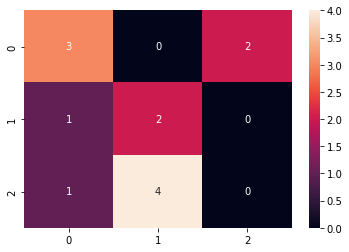

In [27]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

#Making prediction from model
y_pred = model.predict(X_test)

acc_num = accuracy_score(y_test, y_pred)
percentage = "{:.0%}".format(acc_num)


#Plot Confusion matriz
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print('\n')
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(f"Accuracy: {percentage}")



              precision    recall  f1-score   support

           A       0.80      0.80      0.80         5
           C       0.50      0.67      0.57         3
           P       0.50      0.40      0.44         5

    accuracy                           0.62        13
   macro avg       0.60      0.62      0.61        13
weighted avg       0.62      0.62      0.61        13



[[4 0 1]
 [0 2 1]
 [1 2 2]]


Accuracy: 62%


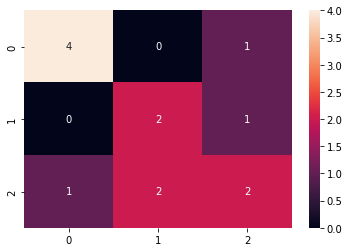

In [28]:
# Instantiate an XGBoost object with hyperparameters

#xgb_clf = xgb.XGBClassifier(eta = 0.3, max_depth=3, n_estimators=100, objective='multi:softmax', booster='gbtree', num_class = 3, random_state=42)
xgb_clf = xgb.XGBClassifier()

# Train the model with train data sets
xgb_clf.fit(X_train, y_train)

#New model evaluate

preds = xgb_clf.predict(X_test)#Predictions

# Accuracy
acc_num = accuracy_score(y_test, preds)
percentage = "{:.0%}".format(acc_num)


#Plot Confusion matriz
cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,annot=True)
print('\n')
print(classification_report(y_test,preds))
print('\n')
print(confusion_matrix(y_test,preds))
print('\n')
print(f"Accuracy: {percentage}")

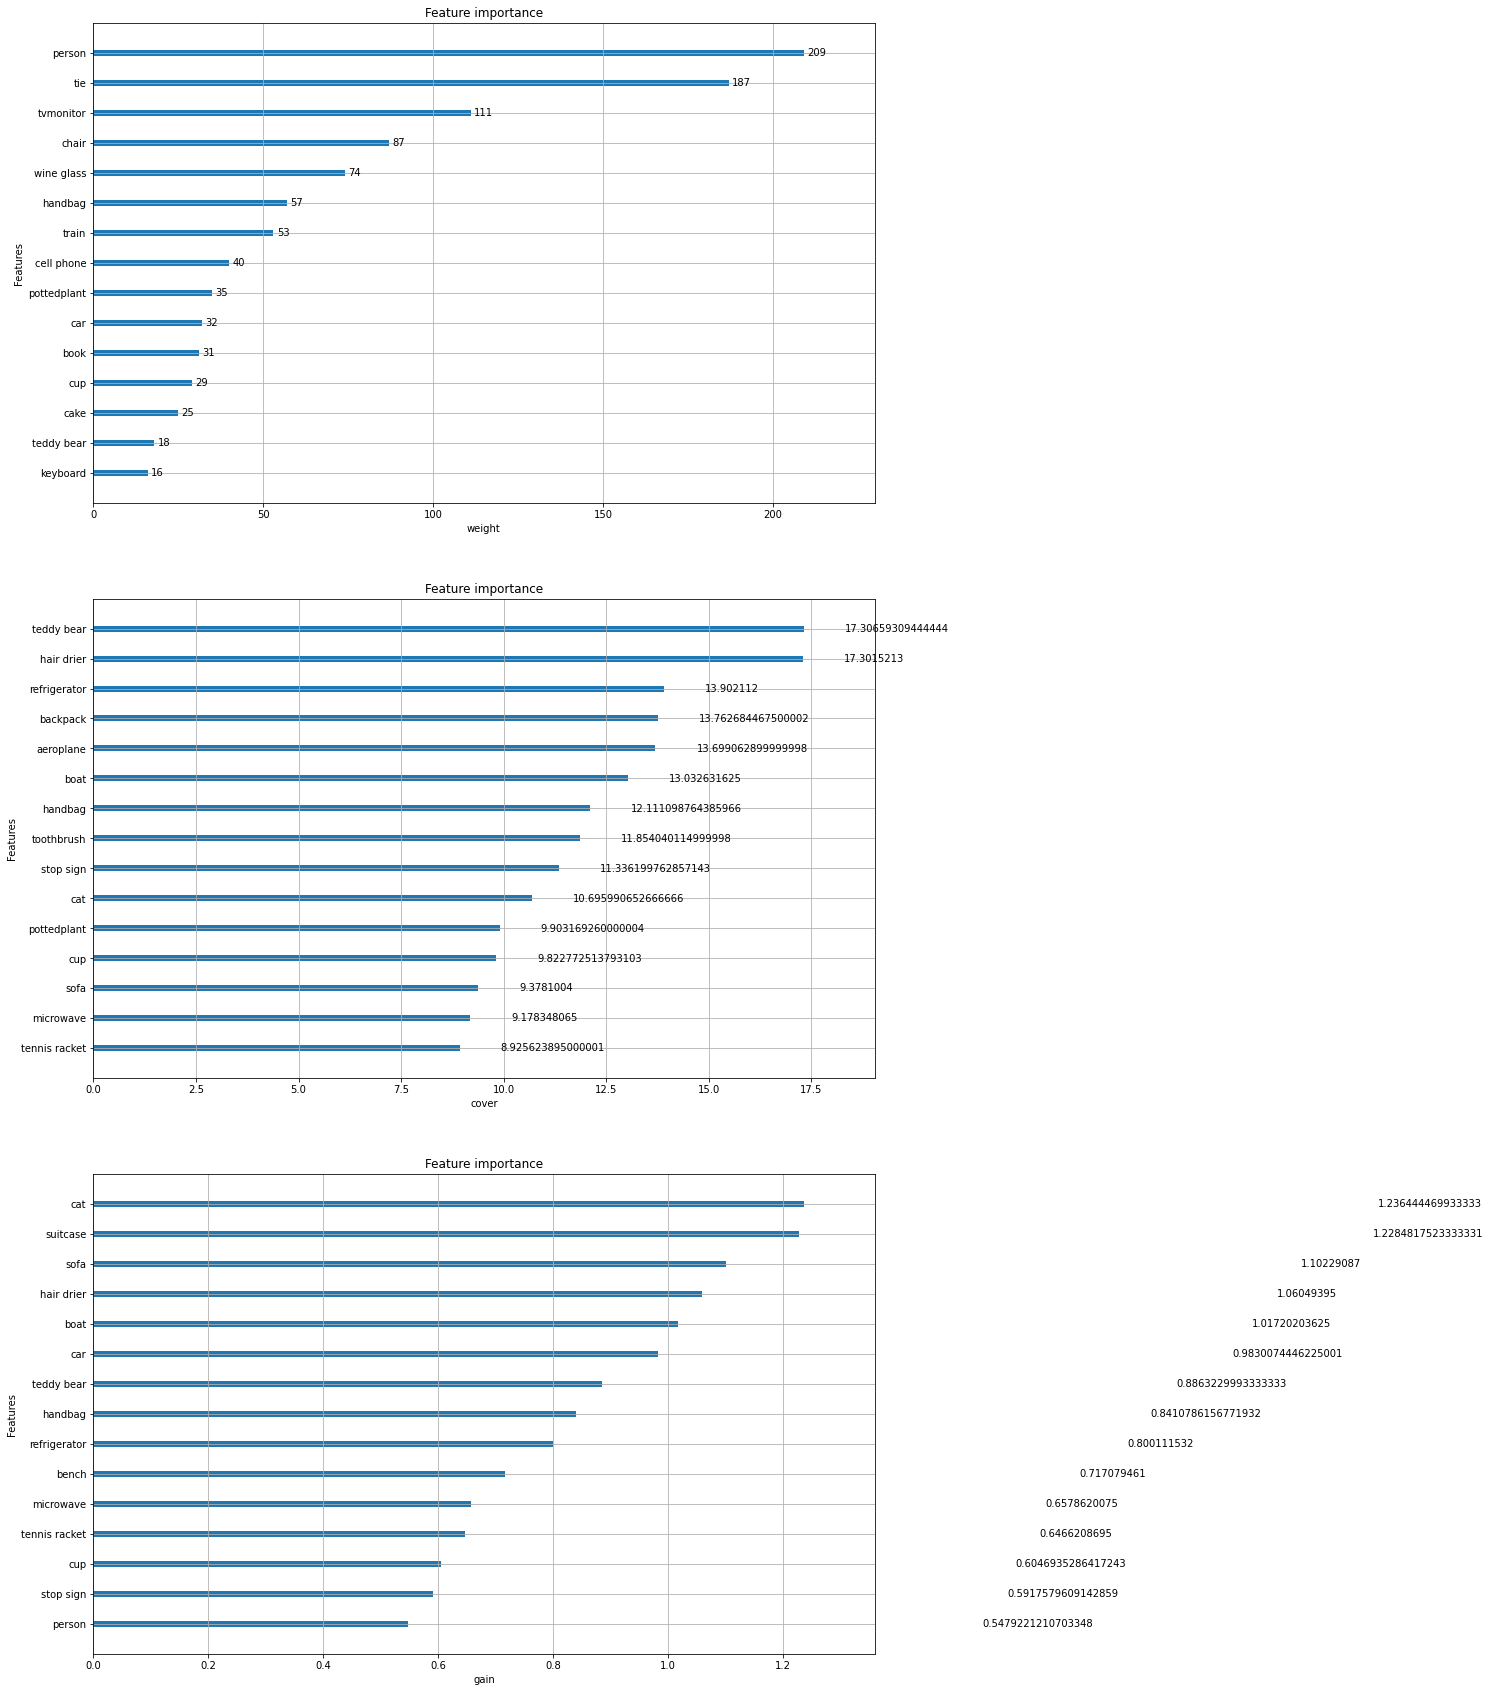

In [29]:
from xgboost import plot_importance

#The gain type shows the average gain across all splits where feature was used. 

#plot_importance(xgb_clf,importance_type='gain')
#plot_importance(xgb_clf, max_num_features=10,importance_type='gain') #show top 10 most important features
#plt.show()

fig, ax = plt.subplots(3,1,figsize=(14,30))

nfeats = 15
importance_types = ['weight', 'cover', 'gain']

for i, imp_i in enumerate(importance_types):
    plot_importance(xgb_clf, ax=ax[i], max_num_features=nfeats
                    , importance_type=imp_i
                    , xlabel=imp_i)

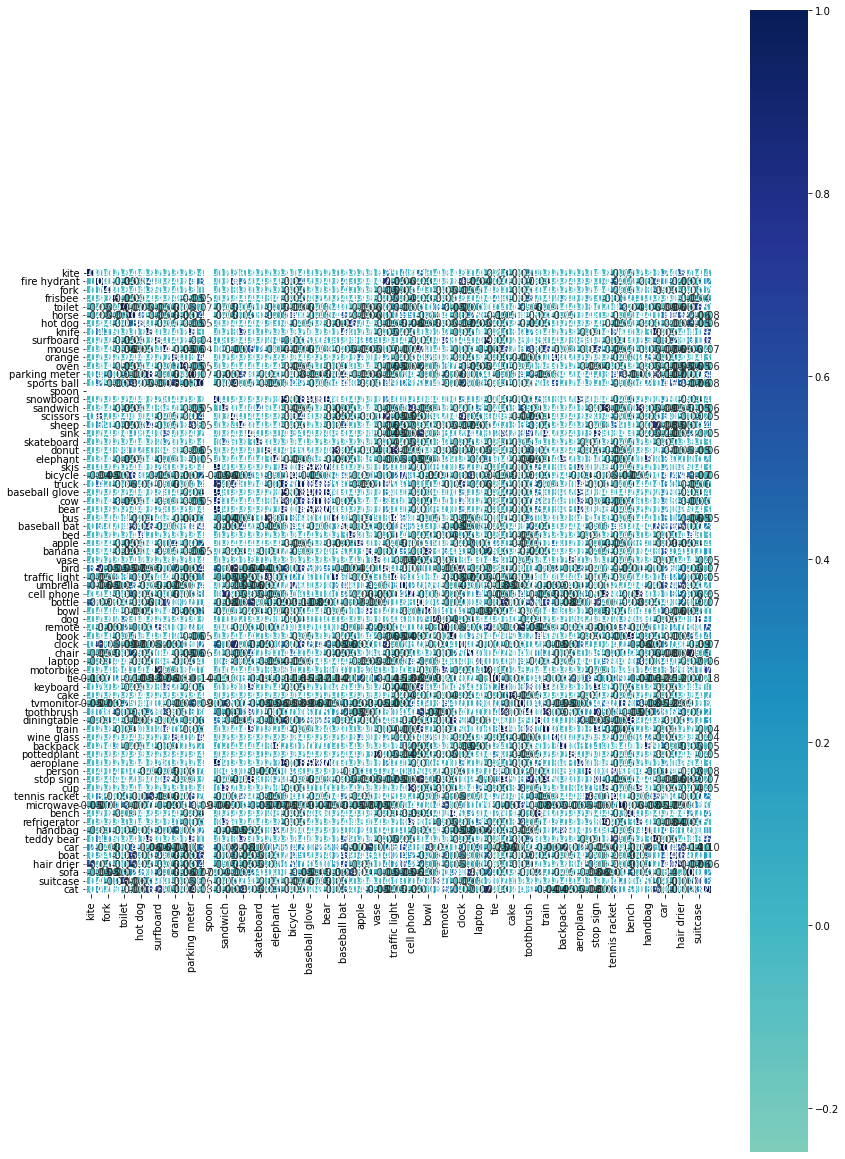

In [39]:
#Correlation map

sorted_idx = xgb_clf.feature_importances_.argsort()

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(14,30))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(X_train[df.columns[sorted_idx]])

Text(0.5, 0, 'Permutation Importance')

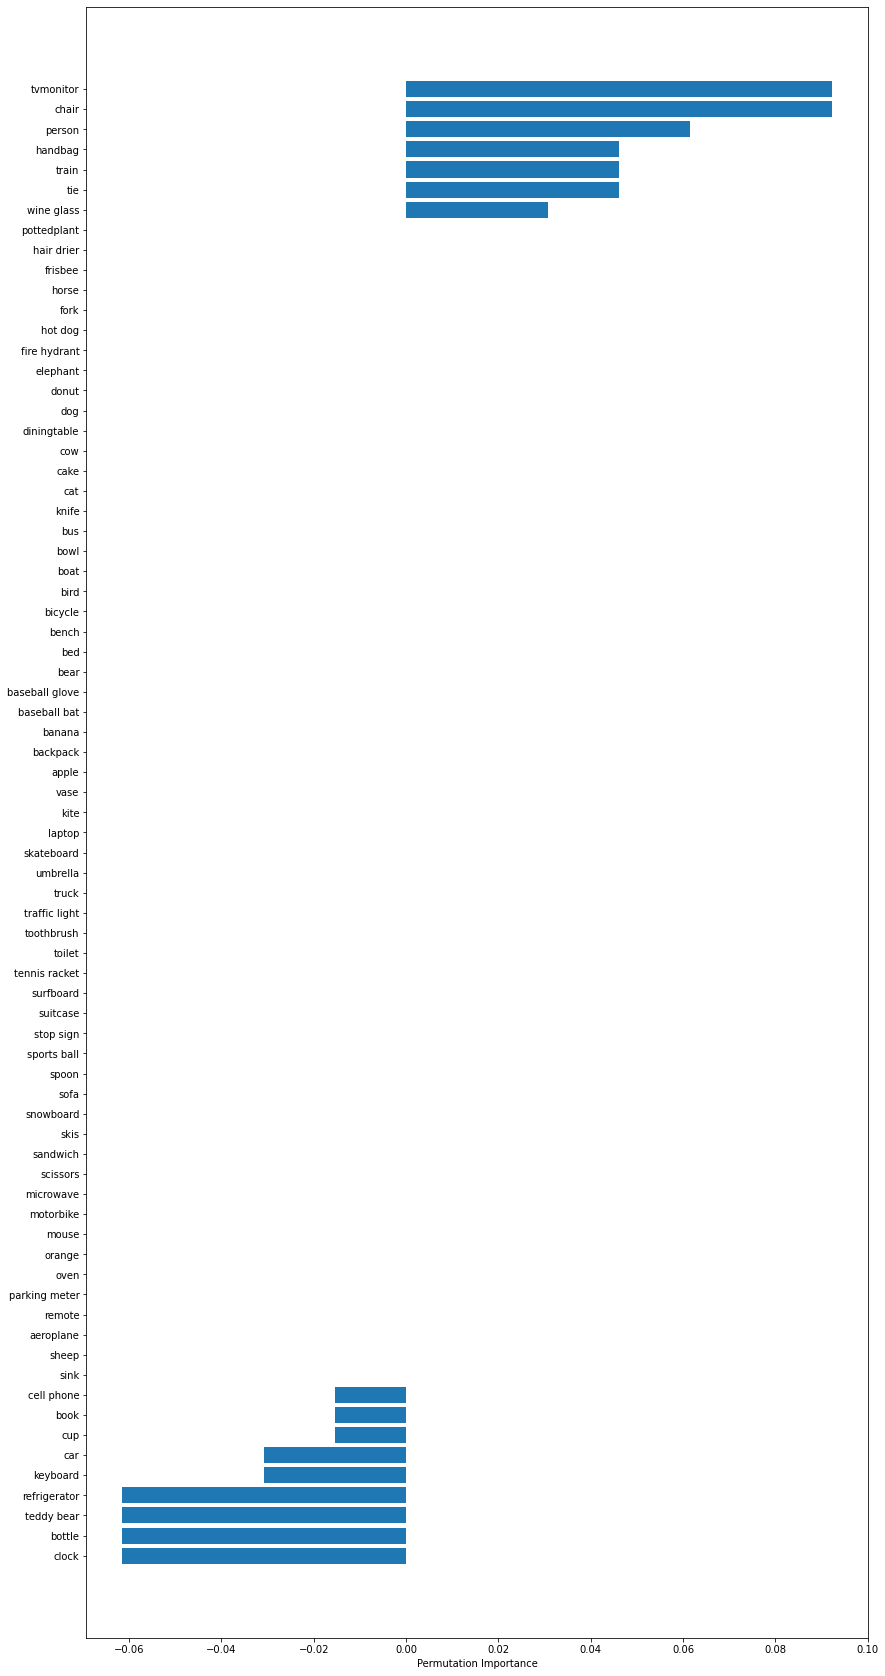

In [42]:
#Permutation importance works for many scikit-learn estimators. 
#It shuffles the data and removes different input variables in order to see relative changes in calculating the training model. 
#It also measures how much the outcome goes up or down given the input variable, thus calculating their impact on the results.
#The permutation based method can have problem with highly-correlated features.

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xgb_clf, X_test, y_test)

fig, ax = plt.subplots(1,1,figsize=(14,30))

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df.columns[sorted_idx],perm_importance.importances_mean[sorted_idx],)
plt.xlabel("Permutation Importance")

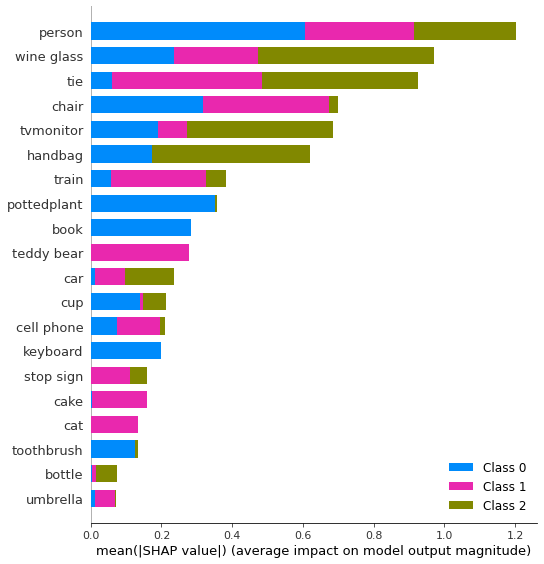

In [46]:
#Shap package, model-agnostic and using the Shapley values from game theory to estimate the how does each feature contribute to the prediction.

explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")



              precision    recall  f1-score   support

           A       0.62      1.00      0.77         5
           C       0.33      0.33      0.33         3
           P       0.50      0.20      0.29         5

    accuracy                           0.54        13
   macro avg       0.49      0.51      0.46        13
weighted avg       0.51      0.54      0.48        13



[[5 0 0]
 [1 1 1]
 [2 2 1]]


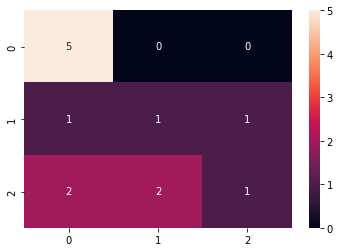

In [55]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

#Evaluate

dtree_predictions = dtree_model.predict(X_test) #Prediction

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

sns.heatmap(cm,annot=True)
print('\n')
print(classification_report(y_test,dtree_predictions))
print('\n')
print(confusion_matrix(y_test,dtree_predictions))

31%
              precision    recall  f1-score   support

           A       0.60      0.60      0.60         5
           C       0.00      0.00      0.00         3
           P       0.25      0.20      0.22         5

    accuracy                           0.31        13
   macro avg       0.28      0.27      0.27        13
weighted avg       0.33      0.31      0.32        13



[[3 0 2]
 [2 0 1]
 [0 4 1]]


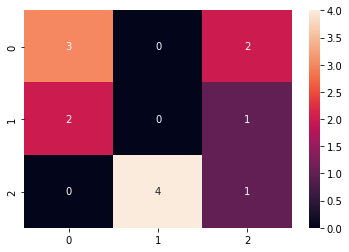

In [58]:
# training a linear SVM classifier
from sklearn.svm import SVC

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)#prediction

#Evaluate

# model accuracy for X_test 
accuracy = svm_model_linear.score(X_test, y_test)
percentage = "{:.0%}".format(accuracy)
print(f"Accuracy:{percentage}")
 
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm,annot=True)

print(classification_report(y_test,svm_predictions))
print('\n')
print(confusion_matrix(y_test,svm_predictions))

0.23076923076923078
              precision    recall  f1-score   support

           A       1.00      0.20      0.33         5
           C       0.14      0.33      0.20         3
           P       0.20      0.20      0.20         5

    accuracy                           0.23        13
   macro avg       0.45      0.24      0.24        13
weighted avg       0.49      0.23      0.25        13



[[1 2 2]
 [0 1 2]
 [0 4 1]]




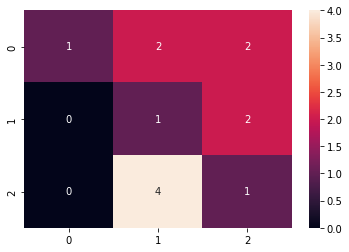

In [57]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

#Evaluate

#new model for comparison
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
percentage = "{:.0%}".format(accuracy)


# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
sns.heatmap(cm,annot=True)

print(f"Accuracy:{percentage}")
print("\n")
print(classification_report(y_test,gnb_predictions))
print('\n')
print(confusion_matrix(y_test,gnb_predictions))
print('\n')

In [59]:
#Dataset with average of probabilities

#load dataframe from csv
df = pd.read_csv("/content/drive/MyDrive/data/Result_avg.csv")

#print dataframe
#print(df)
df.head()

,aeroplane,apple,backpack,banana,baseball bat,baseball glove,bear,bed,bench,bicycle,...,toilet,toothbrush,traffic light,train,truck,tvmonitor,umbrella,vase,wine glass,Target
0,0.0,0.0,0.0,0.000,0.00,0.00,0.0,0.0,0.0,0.000,...,0.0,0.0,0.27,0.00,0.0,0.486422,0.000000,0.0,0.265,A
1,0.0,0.0,0.0,0.000,0.00,0.00,0.0,0.0,0.0,0.263,...,0.0,0.0,0.00,0.27,0.0,0.000000,0.000000,0.0,0.000,A
2,0.0,0.0,0.0,0.295,0.25,0.00,0.0,0.0,0.0,0.000,...,0.0,0.0,0.00,0.00,0.0,0.516087,0.382857,0.0,0.270,A
3,0.0,0.0,0.0,0.000,0.00,0.00,0.0,0.0,0.0,0.000,...,0.0,0.0,0.00,0.00,0.0,0.367575,0.000000,0.0,0.000,A
4,0.0,0.0,0.0,0.000,0.00,0.25,0.0,0.0,0.0,0.000,...,0.0,0.0,0.00,0.40,0.0,0.380000,0.000000,0.0,0.000,A


In [62]:
#Train-test split

X = df.drop('Target',axis=1)
y = df['Target']

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)



              precision    recall  f1-score   support

           A       0.67      0.40      0.50         5
           C       0.43      1.00      0.60         3
           P       0.33      0.20      0.25         5

    accuracy                           0.46        13
   macro avg       0.48      0.53      0.45        13
weighted avg       0.48      0.46      0.43        13



[[2 1 2]
 [0 3 0]
 [1 3 1]]


Accuracy: 46%


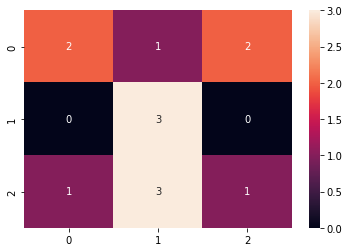

In [63]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

#Making prediction from model
y_pred = model.predict(X_test)

acc_num = accuracy_score(y_test, y_pred)
percentage = "{:.0%}".format(acc_num)


#Plot Confusion matriz
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print('\n')
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(f"Accuracy: {percentage}")
print("\n")

XGBClassifier()


              precision    recall  f1-score   support

           A       0.50      0.60      0.55         5
           C       0.00      0.00      0.00         3
           P       0.40      0.40      0.40         5

    accuracy                           0.38        13
   macro avg       0.30      0.33      0.32        13
weighted avg       0.35      0.38      0.36        13



[[3 1 1]
 [1 0 2]
 [2 1 2]]


Accuracy: 38%




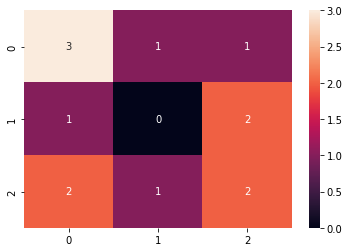

In [64]:
# Instantiate an XGBoost object with hyperparameters

#xgb_clf = xgb.XGBClassifier(eta = 0.3, max_depth=3, n_estimators=100, objective='multi:softmax', booster='gbtree', num_class = 3, random_state=42)
xgb_clf = xgb.XGBClassifier()
print(xgb_clf)

# Train the model with train data sets
xgb_clf.fit(X_train, y_train)

#New model evaluate

preds = xgb_clf.predict(X_test)#Predictions

# Accuracy
acc_num = accuracy_score(y_test, preds)
percentage = "{:.0%}".format(acc_num)


#Plot Confusion matriz
cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,annot=True)
print('\n')
print(classification_report(y_test,preds))
print('\n')
print(confusion_matrix(y_test,preds))
print('\n')
print(f"Accuracy: {percentage}")
print("\n")

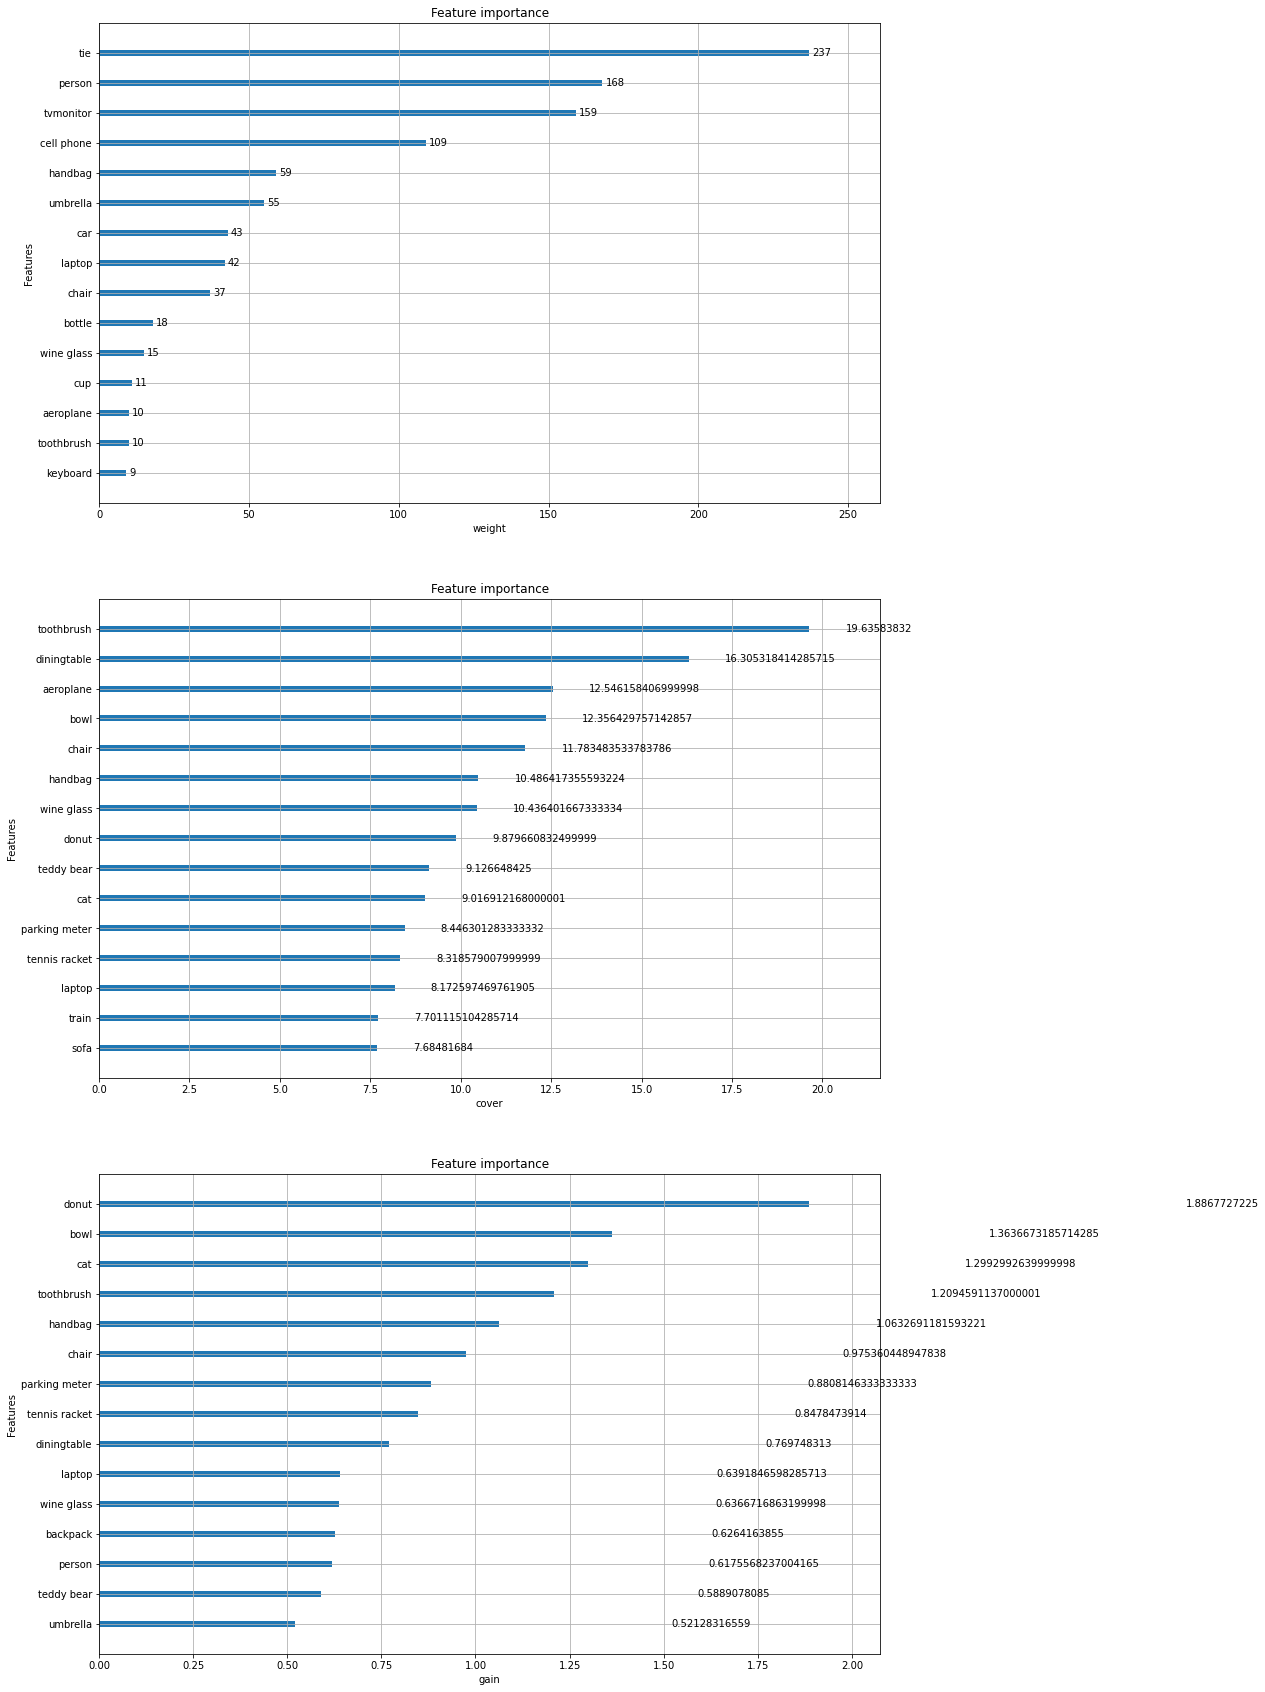

In [65]:
from xgboost import plot_importance

#The gain type shows the average gain across all splits where feature was used. 

#plot_importance(xgb_clf,importance_type='gain')
#plot_importance(xgb_clf, max_num_features=10,importance_type='gain') #show top 10 most important features
#plt.show()

fig, ax = plt.subplots(3,1,figsize=(14,30))

nfeats = 15
importance_types = ['weight', 'cover', 'gain']

for i, imp_i in enumerate(importance_types):
    plot_importance(xgb_clf, ax=ax[i], max_num_features=nfeats
                    , importance_type=imp_i
                    , xlabel=imp_i)

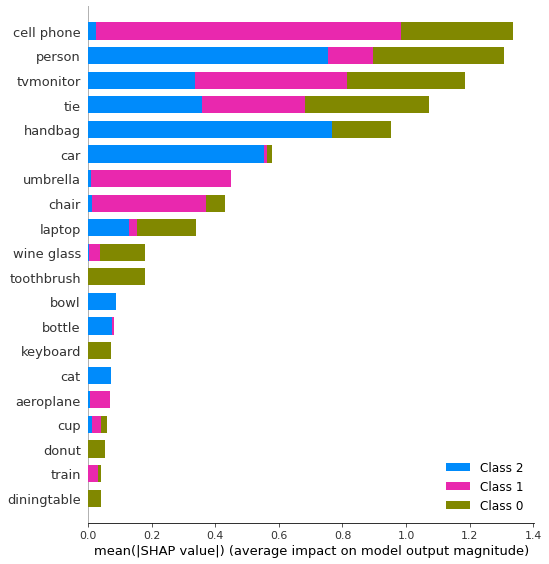

In [66]:
#Estimate the how does each feature contribute to the prediction.

explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")



              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           C       0.11      0.33      0.17         3
           P       0.25      0.20      0.22         5

    accuracy                           0.15        13
   macro avg       0.12      0.18      0.13        13
weighted avg       0.12      0.15      0.12        13



[[0 4 1]
 [0 1 2]
 [0 4 1]]


Accuracy: 15%




Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


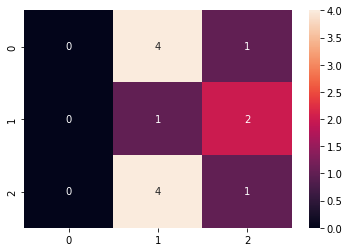

In [67]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

#Evaluate

dtree_predictions = dtree_model.predict(X_test) #Prediction

# Accuracy
acc_num = accuracy_score(y_test, dtree_predictions)
percentage = "{:.0%}".format(acc_num)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

sns.heatmap(cm,annot=True)
print('\n')
print(classification_report(y_test,dtree_predictions))
print('\n')
print(confusion_matrix(y_test,dtree_predictions))
print("\n")
print(f"Accuracy: {percentage}")
print("\n")

SVM Accuracy: 38%


              precision    recall  f1-score   support

           A       0.44      0.80      0.57         5
           C       0.00      0.00      0.00         3
           P       1.00      0.20      0.33         5

    accuracy                           0.38        13
   macro avg       0.48      0.33      0.30        13
weighted avg       0.56      0.38      0.35        13



[[4 1 0]
 [3 0 0]
 [2 2 1]]




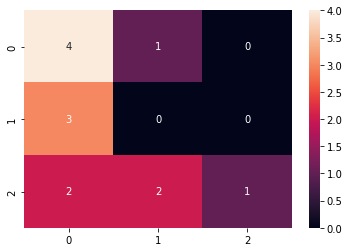

In [68]:
# training a linear SVM classifier
from sklearn.svm import SVC

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)#prediction

#Evaluate

# model accuracy for X_test 
accuracy = "{:.0%}".format(svm_model_linear.score(X_test, y_test))
print(f"SVM Accuracy: {accuracy}")
print("\n")
 
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm,annot=True)

print(classification_report(y_test,svm_predictions))
print('\n')
print(confusion_matrix(y_test,svm_predictions))
print('\n')

NVB Accuracy: 15%


              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           C       0.11      0.33      0.17         3
           P       0.33      0.20      0.25         5

    accuracy                           0.15        13
   macro avg       0.15      0.18      0.14        13
weighted avg       0.15      0.15      0.13        13



[[0 5 0]
 [0 1 2]
 [1 3 1]]




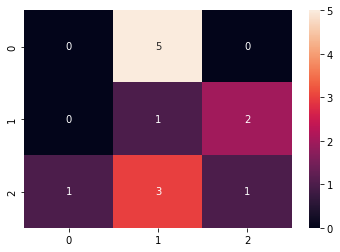

In [69]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

#Evaluate

# accuracy on X_test
accuracy = "{:.0%}".format(gnb.score(X_test, y_test))
print (f"NVB Accuracy: {accuracy}")
print("\n")

# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
sns.heatmap(cm,annot=True)

print(classification_report(y_test,gnb_predictions))
print('\n')
print(confusion_matrix(y_test,gnb_predictions))
print('\n')

In [ ]:
#https://python.plainenglish.io/how-to-convert-google-colab-notebook-ipynb-to-html-ccfeda199246

%%shell
jupyter nbconvert --to html ///content/Untitled1.ipynb

[NbConvertApp] Converting notebook ///content/Untitled1.ipynb to html
[NbConvertApp] ERROR | Notebook JSON is invalid: data must be valid exactly by one of oneOf definition

Failed validating <unset> in notebook:

On instance:
<unset>
/usr/local/lib/python3.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Writing 2314328 bytes to ///content/Untitled1.html
